In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


In [3]:
df = pd.read_csv("Early stage diabetes risk prediction using machine learning.csv")
df.head()
df.tail()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [4]:
scores = {}

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    object
 3   polydipsia          520 non-null    object
 4   sudden_weight_loss  520 non-null    object
 5   weakness            520 non-null    object
 6   polyphagia          520 non-null    object
 7   genital_thrush      520 non-null    object
 8   visual_blurring     520 non-null    object
 9   itching             520 non-null    object
 10  irritability        520 non-null    object
 11  delayed_healing     520 non-null    object
 12  partial_paresis     520 non-null    object
 13  muscle_stiffness    520 non-null    object
 14  alopecia            520 non-null    object
 15  obesity             520 non-null    object
 16  class               520 no

In [6]:
df.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

In [7]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,age
count,520.00
mean,48.03
std,12.15
min,16.00
25%,39.00
50%,47.50
75%,57.00
max,90.00


# data preprocessing

In [8]:
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [9]:
feature_columns = ['age','gender','polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity']

In [10]:
mymap = {'Yes':1, 'No':0,'Male':0, 'Female':1}
for i in feature_columns:
    if i=='age':
        continue
    df[i]=df[i].map(mymap)
df.head()


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [11]:
df.tail()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
515,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,Positive
516,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,Positive
517,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,Positive
518,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,Negative
519,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Negative


# Model selection and metrics functions

In [12]:
from sklearn.model_selection import train_test_split


X = df[feature_columns]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    list1 = []
    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    list1=[clf_report]
    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    list1.append(clf_report)
    return list1

# ADABOOST algorithm

In [14]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
list2 = evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[138   8]
 [ 14 204]]
ACCURACY SCORE:
0.9396
CLASSIFICATION REPORT:
           Negative  Positive  accuracy  macro avg  weighted avg
precision      0.91      0.96      0.94       0.94          0.94
recall         0.95      0.94      0.94       0.94          0.94
f1-score       0.93      0.95      0.94       0.94          0.94
support      146.00    218.00      0.94     364.00        364.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[50  4]
 [ 5 97]]
ACCURACY SCORE:
0.9423
CLASSIFICATION REPORT:
           Negative  Positive  accuracy  macro avg  weighted avg
precision      0.91      0.96      0.94       0.93          0.94
recall         0.93      0.95      0.94       0.94          0.94
f1-score       0.92      0.96      0.94       0.94          0.94
support       54.00    102.00      0.94     156.00        156.00


In [15]:
df3 = list2[0]
df3 = df3.head(3)
df4 = list2[1]
df4 = df4.head(3)

In [16]:
df3
writer = pd.ExcelWriter('df3.xlsx')
df3.to_excel(writer)
writer.save()

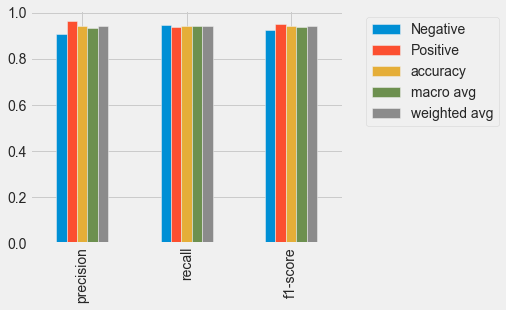

In [17]:
df3.plot(y=df3.columns,kind="bar", figsize=(5,4))
plt.legend(bbox_to_anchor=(1.05,1))

In [18]:
df4
writer = pd.ExcelWriter('df4.xlsx')
df4.to_excel(writer)
writer.save()

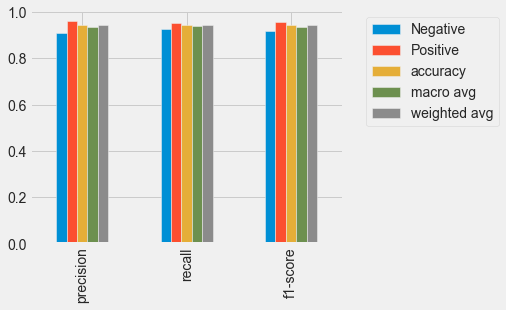

In [19]:
df4.plot(y=df4.columns,kind="bar", figsize=(5,4))
plt.legend(bbox_to_anchor=(1.05,1))

# RANDOM FOREST algorithm

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
list3 = evaluate(rf_clf, X_train, X_test, y_train, y_test)

scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[146   0]
 [  0 218]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
           Negative  Positive  accuracy  macro avg  weighted avg
precision      1.00      1.00      1.00       1.00          1.00
recall         1.00      1.00      1.00       1.00          1.00
f1-score       1.00      1.00      1.00       1.00          1.00
support      146.00    218.00      1.00     364.00        364.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 54   0]
 [  1 101]]
ACCURACY SCORE:
0.9936
CLASSIFICATION REPORT:
           Negative  Positive  accuracy  macro avg  weighted avg
precision      0.98      1.00      0.99       0.99          0.99
recall         1.00      0.99      0.99       1.00          0.99
f1-score       0.99      1.00      0.99       0.99          0.99
support       54.00    102.00      0.99     156.00        156.00


In [21]:
df5 = list3[0]
df5 = df5.head(3)
df6 = list3[1]
df6 = df6.head(3)

In [22]:
writer = pd.ExcelWriter('df5.xlsx')
df5.to_excel(writer)
writer.save()
df5

,Negative,Positive,accuracy,macro avg,weighted avg
precision,1.00,1.00,1.00,1.00,1.00
recall,1.00,1.00,1.00,1.00,1.00
f1-score,1.00,1.00,1.00,1.00,1.00


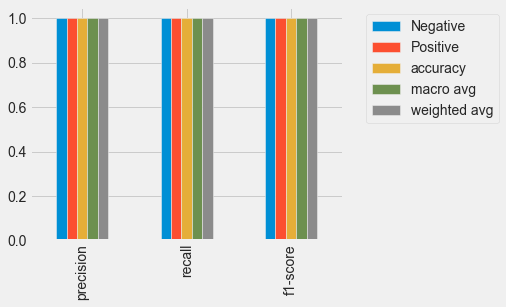

In [23]:
df5.plot(y=df5.columns,kind="bar", figsize=(5,4))
plt.legend(bbox_to_anchor=(1.05,1))

In [24]:
writer = pd.ExcelWriter('df6.xlsx')
df6.to_excel(writer)
writer.save()
df6

,Negative,Positive,accuracy,macro avg,weighted avg
precision,0.98,1.00,0.99,0.99,0.99
recall,1.00,0.99,0.99,1.00,0.99
f1-score,0.99,1.00,0.99,0.99,0.99


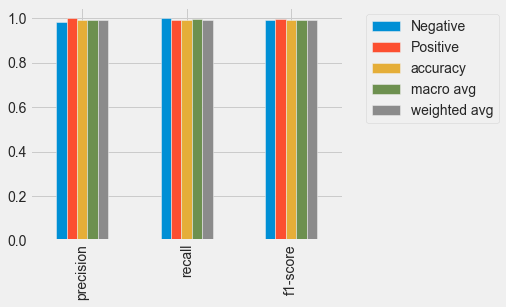

In [25]:
df6.plot(y=df6.columns,kind="bar", figsize=(5,4))
plt.legend(bbox_to_anchor=(1.05,1))

# LOGISTIC REGRESSION algorithm

In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
list4 = evaluate(log_reg, X_train, X_test, y_train, y_test)

scores['LogisticRegression'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[136  10]
 [ 15 203]]
ACCURACY SCORE:
0.9313
CLASSIFICATION REPORT:
           Negative  Positive  accuracy  macro avg  weighted avg
precision      0.90      0.95      0.93       0.93          0.93
recall         0.93      0.93      0.93       0.93          0.93
f1-score       0.92      0.94      0.93       0.93          0.93
support      146.00    218.00      0.93     364.00        364.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[49  5]
 [ 5 97]]
ACCURACY SCORE:
0.9359
CLASSIFICATION REPORT:
           Negative  Positive  accuracy  macro avg  weighted avg
precision      0.91      0.95      0.94       0.93          0.94
recall         0.91      0.95      0.94       0.93          0.94
f1-score       0.91      0.95      0.94       0.93          0.94
support       54.00    102.00      0.94     156.00        156.00


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
df7 = list4[0]
df7 = df7.head(3)
df8 = list4[1]
df8 = df8.head(3)

In [28]:
writer = pd.ExcelWriter('df7.xlsx')
df7.to_excel(writer)
writer.save()
df7

,Negative,Positive,accuracy,macro avg,weighted avg
precision,0.90,0.95,0.93,0.93,0.93
recall,0.93,0.93,0.93,0.93,0.93
f1-score,0.92,0.94,0.93,0.93,0.93


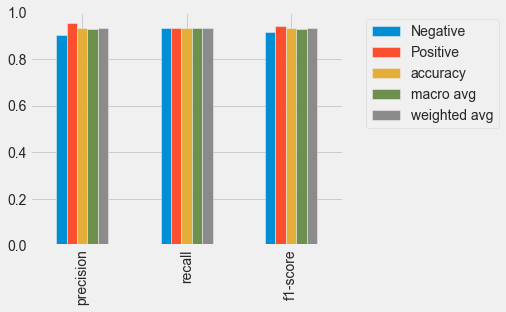

In [29]:
df7.plot(y=df7.columns,kind="bar", figsize=(5,4))
plt.legend(bbox_to_anchor=(1.05,1))

In [30]:
writer = pd.ExcelWriter('df8.xlsx')
df8.to_excel(writer)
writer.save()
df8

,Negative,Positive,accuracy,macro avg,weighted avg
precision,0.91,0.95,0.94,0.93,0.94
recall,0.91,0.95,0.94,0.93,0.94
f1-score,0.91,0.95,0.94,0.93,0.94


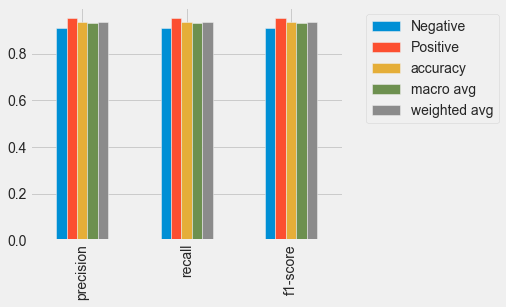

In [31]:
df8.plot(y=df8.columns,kind="bar", figsize=(5,4))
plt.legend(bbox_to_anchor=(1.05,1))

# MODEL COMPARISON

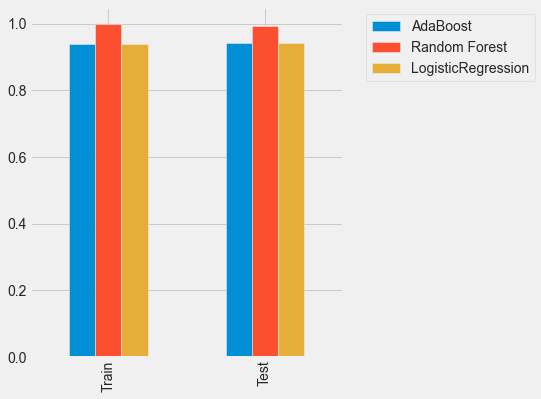

In [34]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='bar', figsize=(5, 6))
plt.legend(bbox_to_anchor=(1.05,1))


In [33]:
writer = pd.ExcelWriter('scores.xlsx')
scores_df.to_excel(writer)
writer.save()
scores_df

,AdaBoost,Random Forest,LogisticRegression
Train,0.94,1.00,0.94
Test,0.94,0.99,0.94
